# A Randomized Hill Climbing Approach to $R(3, k)$ Lower Bounds

**Goal:** We will use a heuristic-based local search algorithms to search for $R(3, k)$ lower bounds. 

**The glueing method:** Take a vertex $v$ of degree $d$. We would like to attach it to some graph $H \in R(3, k-1, n - d - 1)$. So for each neighbor $w$ of $v$, we will make a neighborhood of vertices for $w$ in $H$. These $d$ neighborhoods must be independent sets (in order to ensure no triangles are made in the glueing process). 

**The Warm-Up:** Some example questions to consider:
1. What is the best $n$ we can get from $H \in R(3, 9, 35)$? Can we get 37? 39? 40?
2. What if we use different $H$ graphs, like those in $R(3, 9, 38)$?
3. What if we try values of $k > 10$? What $H$ would we use then? What degree $d$ would be logical to try with $H$?

In [71]:
from sage.graphs.graph_input import from_graph6

In [72]:
with open('graphs/r39_35.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    one_graph = file.readlines() 

In [73]:
r39_35 = Graph() # Create an empty graph
from_graph6(r39_35, one_graph[0]) # Populate it with the first graph in the g6 file. 

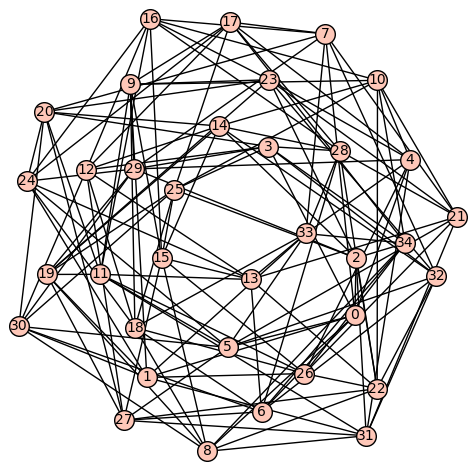

In [74]:
r39_35.plot()

In [79]:
xyz = list(r39_35.complement().all_cliques(7, 7))

In [80]:
len(xyz)

13760

In [81]:
with open('graphs/r310_39', 'r') as file: # Opens the file, and closes it once we exit this block. 
    second_graph = file.readlines() 

In [82]:
second_graph[0][0]

'0'

In [83]:
matrix_for_graph = []
for line in second_graph:
    matrix_row = []
    for i in range(len(line) - 1):
        if line[i] == '0':
            matrix_row.append(0)
        elif line[i] == '1':
            matrix_row.append(1)
        else:
            print("ERROR")
    matrix_for_graph.append(matrix_row)
m = Matrix(matrix_for_graph)

In [84]:
#print(len(matrix_for_graph[0]))

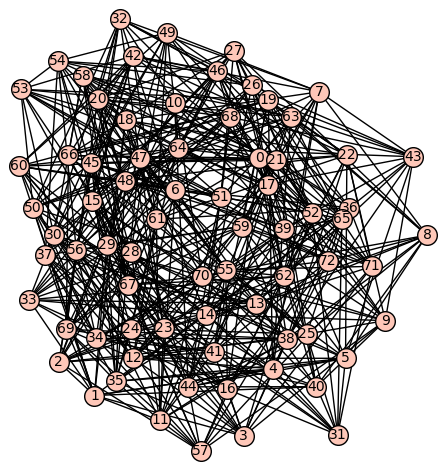

In [46]:
r310_39 = Graph(m).complement()
r310_39.plot()

In [58]:
abc = list(r315_73.complement().all_cliques(13, 14))

In [59]:
print(len(abc))

2915856


## High Level Overview of the Algorithm

Here is one way to approach local search. Our state space is going to be a tuple of $d$ independent sets. Let us call them $N_1, N_2, ..., N_d$. Our objective function is going to be 
$$f(N_1, N_2, ..., N_d) = \text{number of $k$-sized independent sets}.$$
A swap or a "move" in the state-space will be kicking out the neighborhood responsible for many $k$-sized independent sets (probably, $N_i$ doesn't intersect enough large independent sets in $H$) and adding in a new independent set as $N_i$ (the independent set which would output the best $f$ value, say).  

This is just one implementation of local search. Tinkering around with the state space, objective function, swap, etc. may lead to faster and smarter hill climbing approaches.  

## Time to Climb Some Hills

In [8]:
import numpy as np
from sage.graphs.independent_sets import IndependentSets
import sys
import random

In [60]:
"""
Description: To maintain a triangle-free graph in the process of glueing, we want N_i to be independent sets. 
Input: H is the graph we will be gluing v's neighbors' neighborhoods onto. 
Input: n is the number of vertices we want our end graph to be.  
Input: k is the Ramsey number we're looking for. 
Input: ramsey_3_k_minus_1 R(3, k - 1) (needed to bound degrees).
Output: All the independent sets of appropriate size in H. They must be of size at most k - 2 and size at least n - R(3, k - 1) - 1.
"""

R3k = [False,1,3,6,9,14,18,23,28,36] #R3k[i] equals the number R(3,i)

def potential_neighborhoods(H, n, k, ramsey_3_k_minus_1):
    neighborhoods = []
    #min_size = n - ramsey_3_k_minus_1 
    max_size = k - 2
    min_size = max_size - 1
    #indsets = list(IndependentSets(H))
    #for indset in indsets:
        #if len(indset) >= min_size and len(indset) <= max_size:
            #neighborhoods.append(indset)
        #else:
            #continue
    neighborhoods = list(H.complement().all_cliques(min_size, max_size))
    return neighborhoods

potential_neighborhoods(r39_35,39,10,R3k[10-1])

[[14, 17, 22, 23, 29, 31, 33],
 [14, 17, 23, 26, 29, 31, 33],
 [14, 16, 17, 22, 29, 31, 33],
 [14, 16, 17, 26, 29, 31, 33],
 [14, 16, 17, 21, 22, 29, 33],
 [10, 17, 23, 26, 29, 31, 33],
 [4, 9, 14, 16, 21, 22, 34],
 [15, 17, 22, 23, 29, 31, 33],
 [10, 15, 17, 23, 29, 31, 33],
 [9, 14, 16, 22, 25, 31, 33],
 [9, 14, 16, 22, 25, 31, 34],
 [9, 14, 16, 25, 26, 31, 33],
 [7, 9, 14, 22, 25, 31, 34],
 [4, 9, 14, 16, 21, 22, 25],
 [4, 9, 14, 16, 21, 22, 25, 34],
 [4, 9, 14, 16, 22, 25, 34],
 [9, 14, 16, 21, 22, 25, 33],
 [9, 14, 16, 21, 22, 25, 34],
 [4, 9, 14, 16, 21, 25, 34],
 [4, 9, 14, 21, 22, 25, 34],
 [4, 7, 9, 14, 22, 25, 34],
 [4, 9, 16, 21, 25, 32, 34],
 [4, 9, 16, 21, 22, 25, 34],
 [14, 22, 23, 25, 29, 31, 33],
 [14, 22, 23, 25, 29, 31, 34],
 [14, 23, 25, 26, 29, 31, 33],
 [14, 16, 22, 25, 29, 31, 33],
 [14, 16, 22, 25, 29, 31, 34],
 [14, 16, 25, 26, 29, 31, 33],
 [14, 16, 21, 22, 25, 29, 33],
 [14, 16, 21, 22, 25, 29, 34],
 [7, 14, 22, 23, 25, 31, 34],
 [4, 14, 16, 21, 22, 25, 34],
 

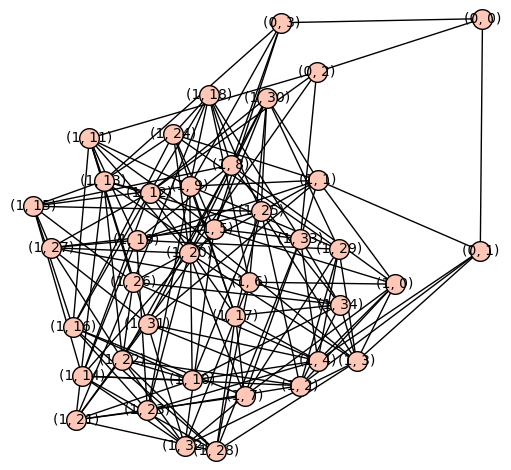

In [10]:
"""
Description: Given a tuple of independent sets, here's the glueing corresponding to it. 
Input: H is the subgraph we are glueing into. 
Input: n is the number of vertices in the end.  
Input: k is Ramsey number we're investigating 
Input: state is the tuple of independent sets.
Output: The graph from the resulting glueing. 
"""

def construct_G(d): #constructs the vertex of degree d along with its neighborhood
    new_vertices = d + 1
    M = [[] for i in range(new_vertices)]
    M[0] = [1 for i in range(new_vertices)]
    M[0][0] = 0
    for v in range(1,new_vertices):
        M[v] = [0 for i in range(new_vertices)]
        M[v][0] = 1
    G = Graph(matrix(M))
    return G

def glue_into_graph(G, H, n, state):
    if len(list(G.vertices())) + len(list(H.vertices())) != n:
        sys.exit('Wrong number of vertices')
    F = G.disjoint_union(H)
    for i in range(1,len(state)+1):
        for vertex in state[i-1]:
            F.add_edge((0,i),(1,vertex))
    return F

G = construct_G(3)
F = glue_into_graph(G,r39_35,39,([1,2,3,4],[20,33,12,11],[5,9,8,13]))
F.plot()

In [11]:
"""
Description: This is the objective function. 
Input: G is the degree d star, H is the graph we're gluing into, n is the number of vertices we end with, 
       k comes from R(3, k), and state describes the potential neighborhoods.
Output: The score of the state. The lower score, the better. Also, the k sized independent sets. 
"""

def objective_function(G, H, n, k, state):
    F = glue_into_graph(G,H,n,state)
    I = list(x for x in IndependentSets(F) if len(x) ==  k)
    value = len(I)
    return value, I

In [12]:
test = construct_G(2)
value, I = objective_function(test,r39_35,38,10,([3, 10, 11, 17, 23, 27, 30, 33], [4, 12, 15, 19, 20, 28, 32, 34]))
print(value)

25


In [13]:
def worst_vertex(ind_sets,d):
    vertices = [(0,i) for i in range(1,d+1)]
    ind_sets = sum(ind_sets,[])
    counts = {vertex:ind_sets.count(vertex) for vertex in vertices}
    worst_vertex = max(counts,key=counts.get)
    return worst_vertex

worst_vertex(I,3)

(0, 1)

In [10]:
"""
Description: This method walks around, looking for glueings that make less and less 10-sized independent sets. 
Input: H is the subgraph we are glueing into. 
Input: n is the number of vertices in the end.  
Input: k is Ramsey number we're investigating 
Input: d is the degree of v.
Output: Print step by step results of the local search. 
"""

# In every loop, we make attempts to find a better neighborhood. If we fail, we just use stick with the last attempt.

def local_search(H, n, k, d):
    neighborhoods = potential_neighborhoods(H, n, k, RAMSEY_CONSTANTS[k-1]) #Find all the potential neighborhoods in H
    
    G = construct_G(d) #Construct a graph consisting of the degree d vertex and its neighborhood
    state = []
    for i in range(d): #For every vertex in the neighborhood of v:
        state.append(neighborhoods[random.randint(0,len(neighborhoods))]) #Find a random neighborhood in H to glue it to
    
    value, I = objective_function(G,H,n,k,state) #Find the number of ind 10-sets in the gluing of the current state
    
    bad_vertex = worst_vertex(I,d) #Find the vertex in the neighborhood of v that participates in the most ind 10-sets
    
    iteration = 0
    while value > 0 and iteration < 15: #While there are ind 10-sets, search for a better state
        iteration += 1
        new_value = value + 1 #Just so we can enter the next while loop
        
        tries = 0
        while new_value > value and tries < 10: #If the new state has more ind 10-sets, try a different one
            index = bad_vertex[1] #Get the vertex whose neighborhood we will change
            new_neighborhood = neighborhoods[random.randint(0,len(neighborhoods))] #Create a new random neighborhood
            attempt = 0
            while len(state[index-1]) > len(new_neighborhood) and attempt < 10: #If the new neighborhood for worst_vertex has less vertices, try a different one
                attempt +=1
                new_neighborhood = neighborhoods[random.randint(0,len(neighborhoods))]
            state[index-1] = new_neighborhood #Replace the neighborhood of the worst-vertex with a new one
            new_value, I = objective_function(G,H,n,k,state) #Determine the new number of ind 10-sets
        
        value = new_value
        bad_vertex = worst_vertex(I,d)
        print(f'iteration:{iteration}      value:{value}        state:{state}')
    
    print(f'iteration:{iteration}      value:{value}        state:{state}')
    
#local_search(r39_35,38,10,2)

# Sherry's Try

In [52]:
RAMSEY_CONSTANTS = [False,1,3,6,9,14,18,23,28,36,41, 48, 54, 60, 67, 74]

In [15]:
"""
Description: 
Input: Tuples in {0, 1} x {range(d + 1), |H|}. 
Output: A matrix, each row an independent set, each column marked 0, 1, 2, ..., |H| - 1. 
"""
def independent_sets_within_H(H, independent_sets):
    matrix = []
    for ind_set in independent_sets:
        H_ind_set = []
        for tup in ind_set:
            if tup[0] == 1:
                H_ind_set.append(tup[1])
        set_H_ind_set = set(H_ind_set)
        row = [1 if i in set_H_ind_set else 0 for i in range(H.order())]
        matrix.append(row)
    return np.array(matrix)

In [16]:
"""
Description: Finds the worst neighborhood (i.e., the neighborhood which fails to intersect enough large IS in H) of a state.
Input: A tuple of d independent sets. 
Output: The neighborhood with the worst l_1 norm 
"""
def worst_in_state(B, state, num_vertices_in_H):
    state_vectors = []
    
    for ind_set in state:
        set_ind_set = set(ind_set)
        vec = np.array([1 if i in set_ind_set else 0 for i in range(num_vertices_in_H)])
        state_vectors.append(vec)
    
    score = np.linalg.norm(np.dot(B, state_vectors[0]), ord=1)
    worst = state[0]
    
    for i in range(1, len(state_vectors)):
        l1_norm = np.linalg.norm(np.dot(B, state_vectors[i]), ord=1)
        if l1_norm < score:
            score = l1_norm
            worst = state[i]
    
    return worst

In [17]:
"""
NOTE: This doesn't work very well. Very volatile / not reflective of independence number. 
Description: Finds the best potential neighborhood to add (i.e., the neighborhood which intersects many of the large IS in H).
Input: A list of independent sets. 
Output: The best neighborhood destroying most independent sets in B. 
"""
def best_choice(B, potential_neighborhoods, num_vertices_in_H):
    potential_vectors = []
    
    for neighborhood in potential_neighborhoods:
        set_neighborhood = set(neighborhood)
        vec = np.array([1 if i in set_neighborhood else 0 for i in range(num_vertices_in_H)])
        potential_vectors.append(vec)
    
    score = np.linalg.norm(np.dot(B, potential_vectors[0]), ord=1)
    best = potential_neighborhoods[0]
    
    for i in range(1, len(potential_vectors)):
        l1_norm = np.linalg.norm(np.dot(B, potential_vectors[i]), ord=1)
        if l1_norm > score:
            score = l1_norm
            best = potential_neighborhoods[i]
    
    return best


In [18]:
def random_better_step(star, H, n, k, incomplete_state, potential_neighborhoods, sample_size=100):
    random_steps = [potential_neighborhoods[i] for i in random.sample(range(len(potential_neighborhoods)), sample_size)]
    
    state = copy(incomplete_state)
    state.append(random_steps[0])
    best_index = 0
    
    curr_value, I = objective_function(star, H, n, k, state)

    for j in range(1, sample_size):
        state.remove(random_steps[j - 1])
        state.append(random_steps[j])
        val, I = objective_function(star, H, n, k, state)
        
        if val < curr_value:
            best_index = j
            curr_value = val
    return random_steps[best_index]

In [19]:
def look_until_better_step(star, H, n, k, incomplete_state, curr_value, potential_neighborhoods, sample_size=100):
    #random_steps = [potential_neighborhoods[i] for i in random.sample(range(len(potential_neighborhoods)), sample_size)]
    random_order = random.sample(range(len(potential_neighborhoods)), len(potential_neighborhoods))
    
    state = copy(incomplete_state)

    for index in random_order:
        state.append(potential_neighborhoods[index])
        val, I = objective_function(star, H, n, k, state)
        
        if val < curr_value:
            #print(f'curr_val was :{curr_value}      and val was :{val}')
            return potential_neighborhoods[index]
        
        state.remove(potential_neighborhoods[index])
     
    print("WARNING: No local moves found!!")
    return potential_neighborhoods[random_order[0]]

In [68]:
"""
Description: This method walks around, looking for glueings that make less and less 10-sized independent sets. 
Input: H is the subgraph we are glueing into. 
Input: n is the number of vertices in the end.  
Input: k is Ramsey number we're investigating 
Input: d is the degree of v.
Output: Print step by step results of the local search. 
"""
def local_search_v2(H, n, k, d):
    neighborhoods = potential_neighborhoods(H, n, k, RAMSEY_CONSTANTS[k-1]) # Find all the appropriately sized independent sets in H
    
    star = construct_G(d) # Construct a graph consisting of the degree d vertex v and its neighborhood
    
    state = []
    for i in range(d): #For every vertex in the neighborhood of v:
        state.append(neighborhoods[random.randint(0,len(neighborhoods))]) #Find a random neighborhood in H to glue it to
    
    value, I = objective_function(star,H,n,k,state) # Find the number of ind 10-sets in the gluing of the current state
    iterations = 0
    
    while value > 0 and iterations < 100: 
        B = independent_sets_within_H(H, I)
        
        swap_out = worst_in_state(B, state, H.order())
        state.remove(swap_out)
        
        #swap_in = best_choice(B, neighborhoods, H.order())
        print("Made it to swap in")
        swap_in = random_better_step(star, H, n, k, state, neighborhoods, sample_size=10)
        #swap_in = look_until_better_step(star, H, n, k, state, value, neighborhoods, sample_size=100)
        state.append(swap_in)
        
        value, I = objective_function(star,H,n,k,state)
        
        #print(swap_out)
        #print(swap_in)
        print(f'iteration:{iterations}      value:{value}        state:{state}')
        print()
        iterations+=1
    print()
    F = glue_into_graph(star,H,n,state)
    return F

In [69]:
#F = local_search_v2(r39_35,39,10,3)

In [70]:
# Different version / run (used third swap out method)
F = local_search_v2(r315_73,76,16,2)  #R(3, 9)

Made it to swap in


KeyboardInterrupt: 

In [60]:
star = construct_G(2)
r310_38 = glue_into_graph(star,r39_35,38,[[14, 17, 23, 26, 29, 31], [2, 4, 9, 19, 24, 28, 30, 32]])

In [62]:
r310_38.clique_number()

2

In [29]:
F.clique_number()

2